#### **(1) Exploratory Data Analysis**

In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats

--- Descriptive Statistics (Numerical) ---
             MinTemp        MaxTemp       Rainfall   Evaporation  \
count  143975.000000  144199.000000  142199.000000  82670.000000   
mean       12.194034      23.221348       2.360918      5.468232   
std         6.398495       7.119049       8.478060      4.193704   
min        -8.500000      -4.800000       0.000000      0.000000   
25%         7.600000      17.900000       0.000000      2.600000   
50%        12.000000      22.600000       0.000000      4.800000   
75%        16.900000      28.200000       0.800000      7.400000   
max        33.900000      48.100000     371.000000    145.000000   

           Sunshine  WindGustSpeed   WindSpeed9am   WindSpeed3pm  \
count  75625.000000  135197.000000  143693.000000  142398.000000   
mean       7.611178      40.035230      14.043426      18.662657   
std        3.785483      13.607062       8.915375       8.809800   
min        0.000000       6.000000       0.000000       0.000000   
25% 

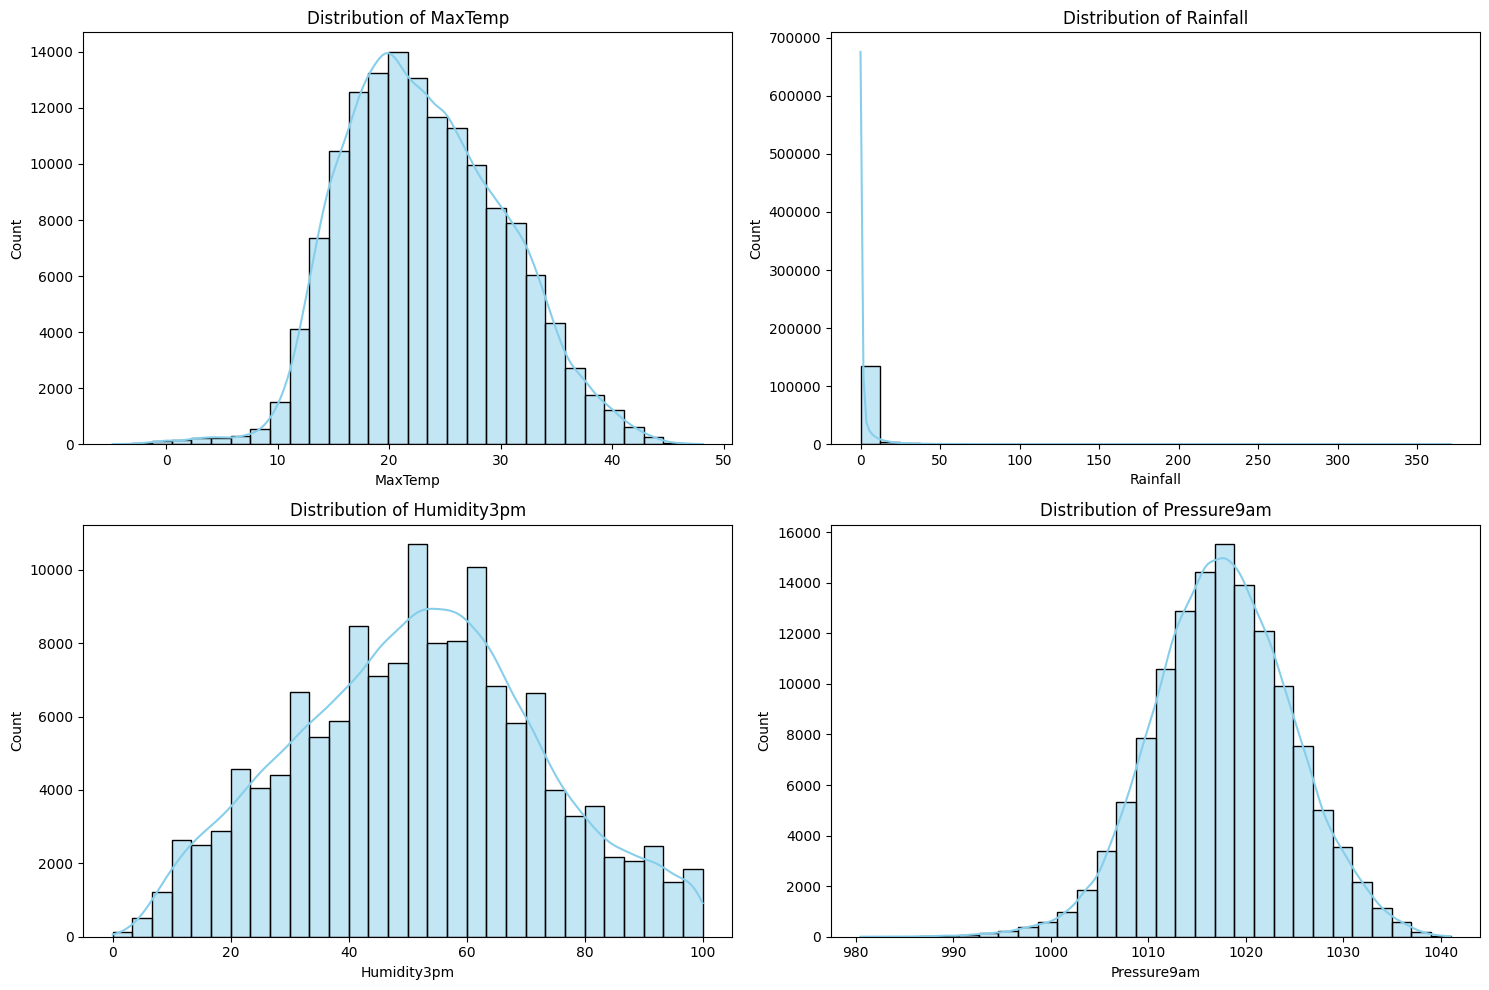

/var/folders/tm/0v_xzs6s5vzfw60jkby5vd980000gn/T/ipykernel_19856/1522611639.py:24: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='RainTomorrow', data=df, palette='viridis')
/var/folders/tm/0v_xzs6s5vzfw60jkby5vd980000gn/T/ipykernel_19856/1522611639.py:29: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='WindGustDir', data=df, order=df['WindGustDir'].value_counts().index, palette='magma')


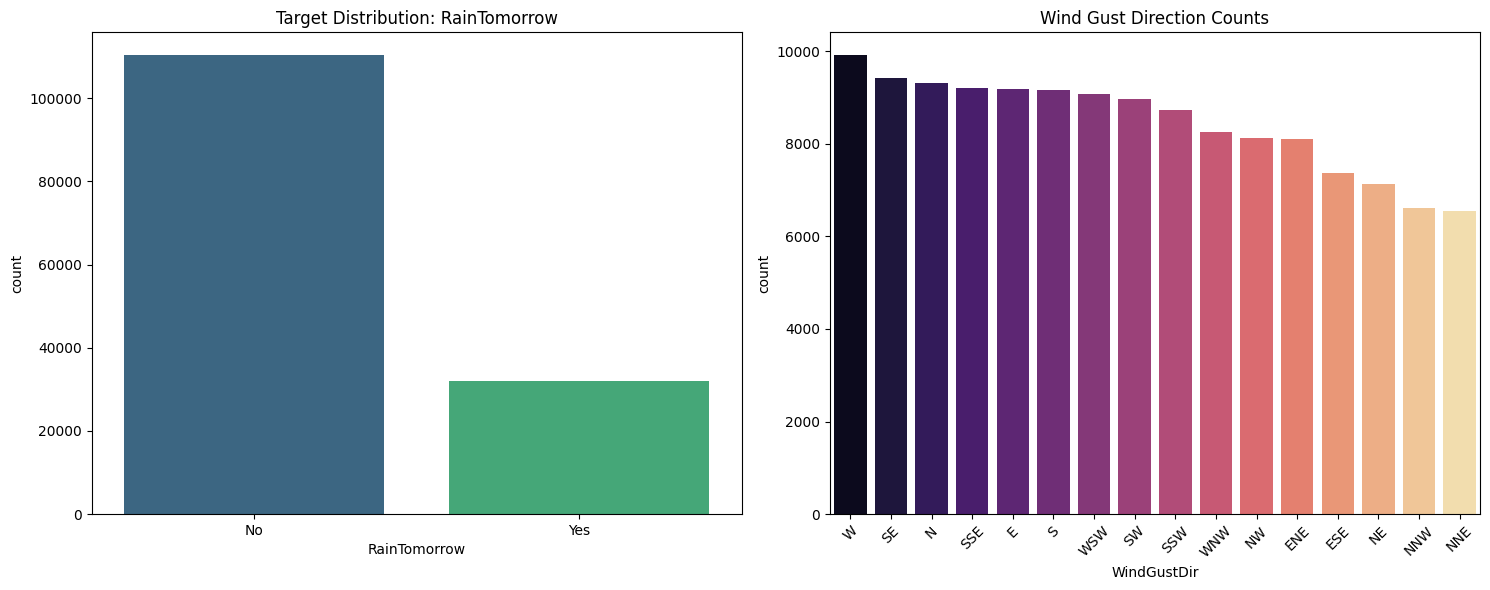

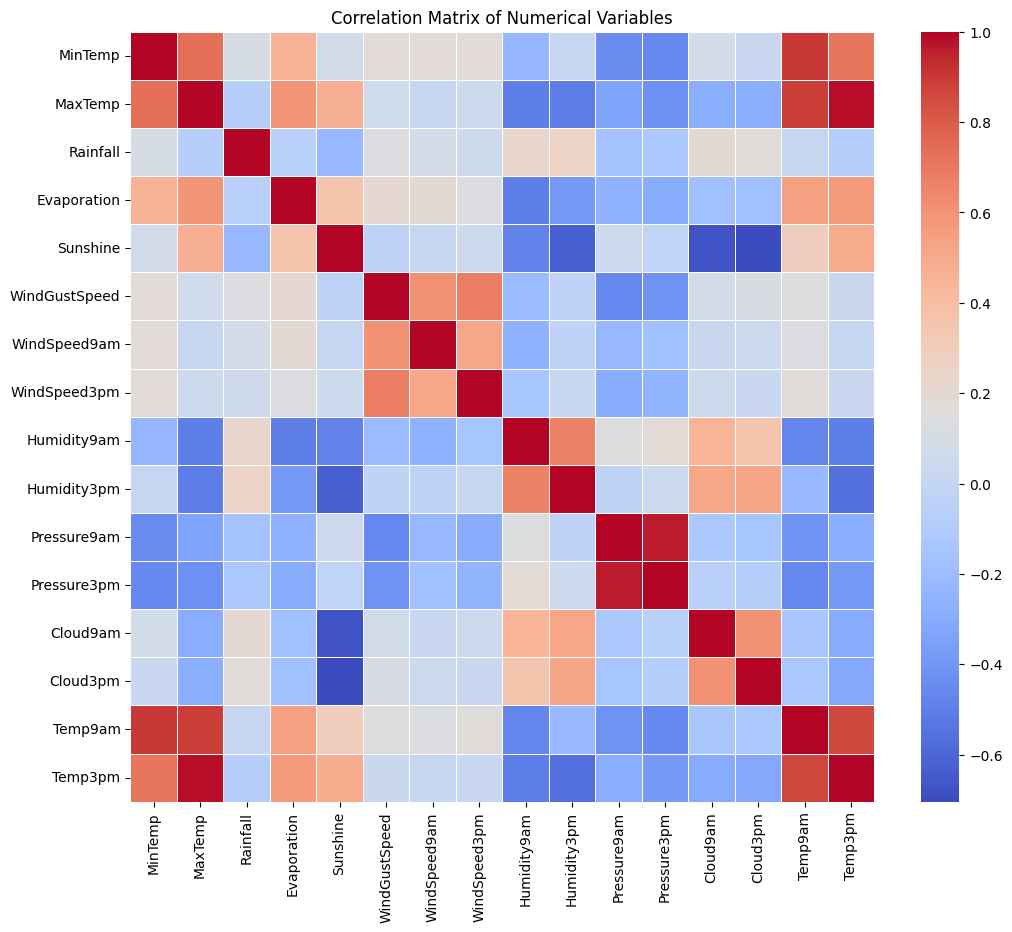

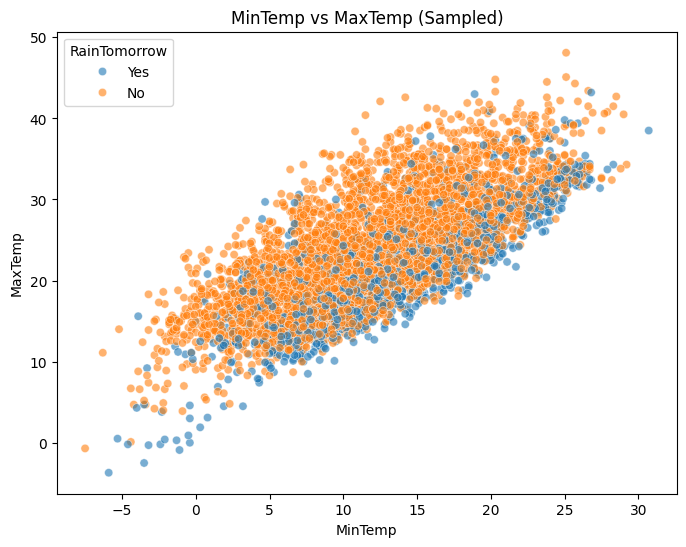

/var/folders/tm/0v_xzs6s5vzfw60jkby5vd980000gn/T/ipykernel_19856/1522611639.py:57: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='RainTomorrow', y='MaxTemp', data=df, palette='Set2')
/var/folders/tm/0v_xzs6s5vzfw60jkby5vd980000gn/T/ipykernel_19856/1522611639.py:61: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='RainTomorrow', y='Humidity3pm', data=df, palette='Set2')


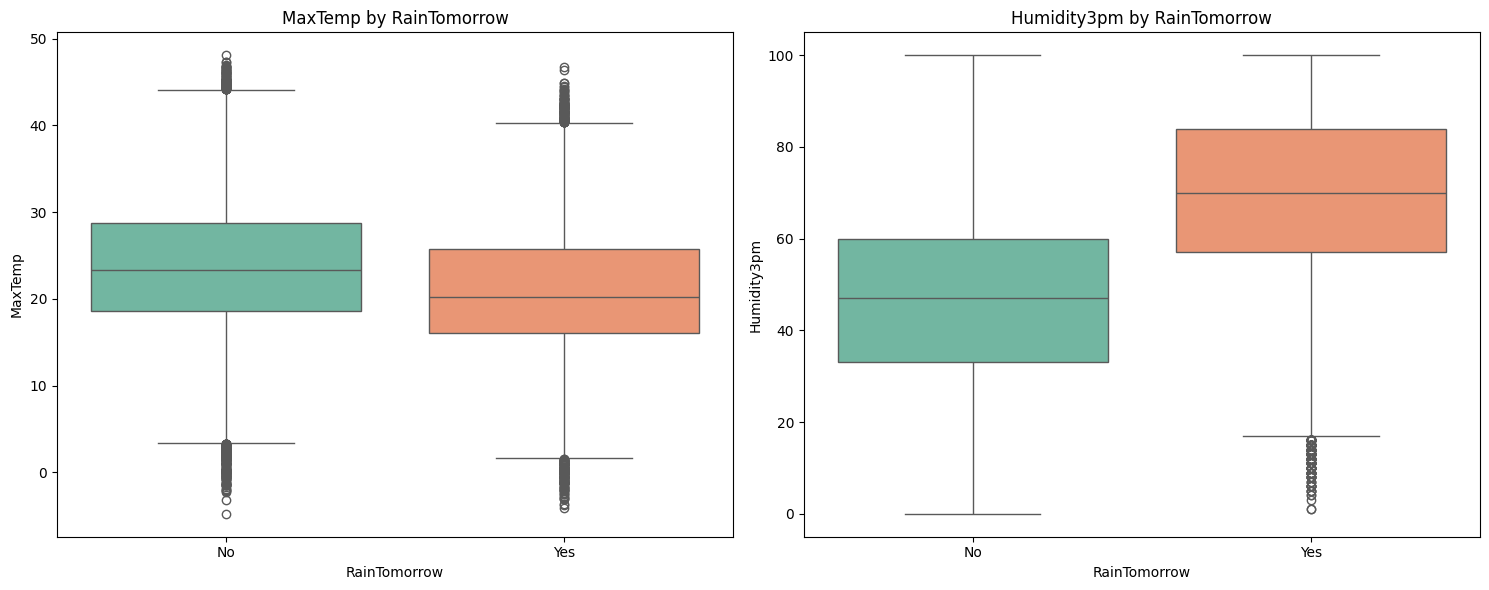


Association (Cramer's V) between RainToday and RainTomorrow: 0.3131

--- Top Missing Values (%) ---
Sunshine         48.009762
Evaporation      43.166506
Cloud3pm         40.807095
Cloud9am         38.421559
Pressure9am      10.356799
Pressure3pm      10.331363
WindDir9am        7.263853
WindGustDir       7.098859
WindGustSpeed     7.055548
Humidity3pm       3.098446
dtype: float64

--- Outlier Detection (IQR Method) ---
Rainfall: 25578 outliers identified
WindGustSpeed: 3092 outliers identified
MaxTemp: 489 outliers identified


In [ ]:
df = pd.read_csv('weatherAUS.csv')

# --- a) Univariate Analysis ---
print("--- Descriptive Statistics (Numerical) ---")
print(df.describe())

print("\n--- Descriptive Statistics (Categorical) ---")
print(df.describe(include=['object']))

# Visualizations: Numerical Distributions
num_cols = ['MaxTemp', 'Rainfall', 'Humidity3pm', 'Pressure9am']
plt.figure(figsize=(15, 10))
for i, col in enumerate(num_cols):
    plt.subplot(2, 2, i+1)
    sns.histplot(df[col].dropna(), kde=True, bins=30, color='skyblue')
    plt.title(f'Distribution of {col}')
plt.tight_layout()
plt.savefig('univariate_numerical.png')
plt.show()

# Visualizations: Categorical Distributions
plt.figure(figsize=(15, 6))
plt.subplot(1, 2, 1)
sns.countplot(x='RainTomorrow', data=df, palette='viridis')
plt.title('Target Distribution: RainTomorrow')

plt.subplot(1, 2, 2)
# Top 10 Wind Directions
sns.countplot(x='WindGustDir', data=df, order=df['WindGustDir'].value_counts().index, palette='magma')
plt.title('Wind Gust Direction Counts')
plt.xticks(rotation=45)
plt.tight_layout()
plt.savefig('univariate_categorical.png')
plt.show()

# --- b) Bivariate Analysis ---

# 1. Correlation Matrix (Numerical)
plt.figure(figsize=(12, 10))
numeric_df = df.select_dtypes(include=[np.number])
corr_matrix = numeric_df.corr()
sns.heatmap(corr_matrix, annot=False, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Matrix of Numerical Variables')
plt.savefig('correlation_matrix.png')
plt.show()

# 2. Scatter Plot (Temp vs Temp)
plt.figure(figsize=(8, 6))
sns.scatterplot(x='MinTemp', y='MaxTemp', data=df.sample(5000, random_state=42), hue='RainTomorrow', alpha=0.6)
plt.title('MinTemp vs MaxTemp (Sampled)')
plt.savefig('scatter_min_max_temp.png')
plt.show()

# 3. Box Plots (Numerical vs Categorical)
plt.figure(figsize=(15, 6))
plt.subplot(1, 2, 1)
sns.boxplot(x='RainTomorrow', y='MaxTemp', data=df, palette='Set2')
plt.title('MaxTemp by RainTomorrow')

plt.subplot(1, 2, 2)
sns.boxplot(x='RainTomorrow', y='Humidity3pm', data=df, palette='Set2')
plt.title('Humidity3pm by RainTomorrow')
plt.tight_layout()
plt.savefig('boxplots_num_cat.png')
plt.show()

# 4. Cramer's V (Categorical Association)
contingency = pd.crosstab(df['RainToday'], df['RainTomorrow'])
chi2, _, _, _ = stats.chi2_contingency(contingency)
n = contingency.sum().sum()
cramers_v = np.sqrt(chi2 / (n * (min(contingency.shape) - 1)))
print(f"\nAssociation (Cramer's V) between RainToday and RainTomorrow: {cramers_v:.4f}")

# --- c) Missing Values & Outliers ---

# seasonal trend analysis
df['Date'] = pd.to_datetime(df['Date'])
df['Month'] = df['Date'].dt.month
monthly_temp = df.groupby('Month')['MaxTemp'].mean().reset_index()

plt.figure(figsize=(10, 6))
sns.lineplot(x='Month', y='MaxTemp', data=monthly_temp, marker='o')
plt.xticks(range(1, 13), ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'])
plt.title('Average Max Temperature by Month')
plt.savefig('seasonal_temp_trend.png')

# Missing Values
missing = df.isnull().mean() * 100
print("\n--- Top Missing Values (%) ---")
print(missing[missing > 0].sort_values(ascending=False).head(10))

# missing values visualization
plt.figure(figsize=(12, 6))
missing_values = df.isnull().sum()
missing_values = missing_values[missing_values > 0].sort_values(ascending=False)
missing_values.plot(kind='bar', color='salmon')
plt.title('Missing Values per Feature')
plt.ylabel('Count')
plt.savefig('missing_values.png')

# top 10 rainiest locations by average daily rainfall
top_locations = df.groupby('Location')['Rainfall'].mean().sort_values(ascending=False).head(10).reset_index()
plt.figure(figsize=(12, 6))
sns.barplot(x='Rainfall', y='Location', data=top_locations, palette='Blues_d')
plt.title('Top 10 Rainiest Locations (Average Daily Rainfall)')
plt.savefig('top_rainy_locations.png')

# Outliers (IQR Method)
print("\n--- Outlier Detection (IQR Method) ---")
outlier_vars = ['Rainfall', 'WindGustSpeed', 'MaxTemp']
for col in outlier_vars:
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    outliers = ((df[col] < (Q1 - 1.5 * IQR)) | (df[col] > (Q3 + 1.5 * IQR))).sum()
    print(f"{col}: {outliers} outliers identified")

#### **(2)  Probability and Sampling**

MLE Parameters: Mean (mu) = 23.2213, Std Dev (sigma) = 7.1190


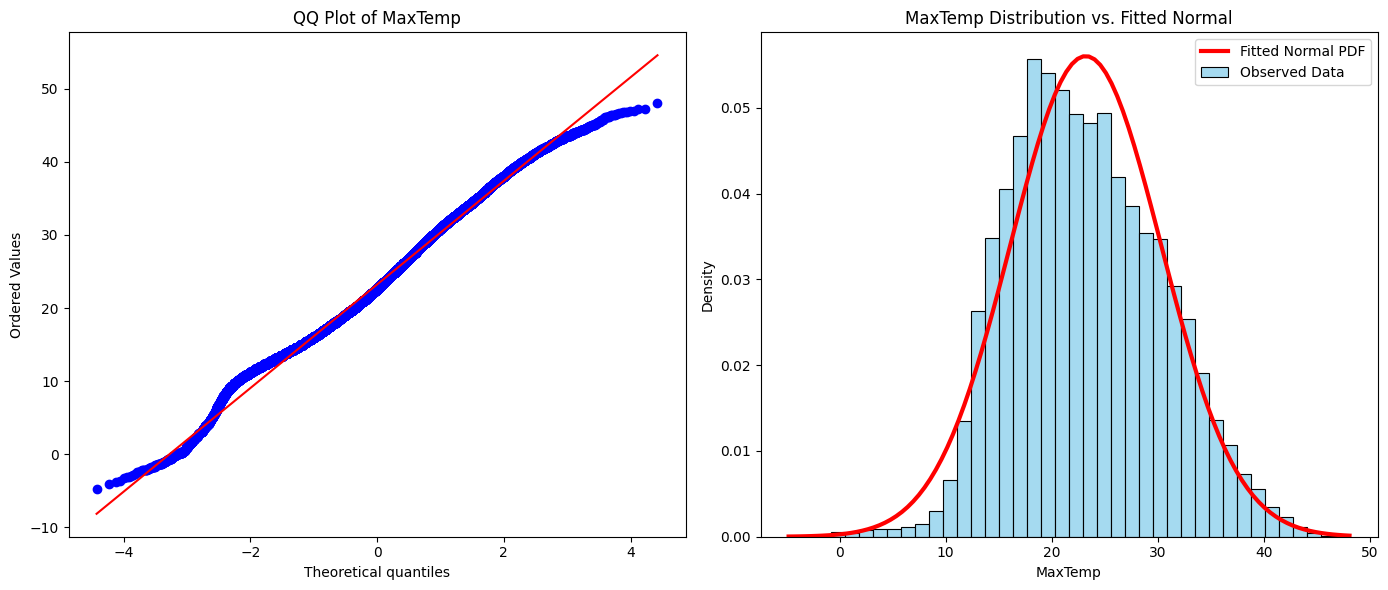

KS Test: Statistic=0.0414, p-value=6.8922e-215


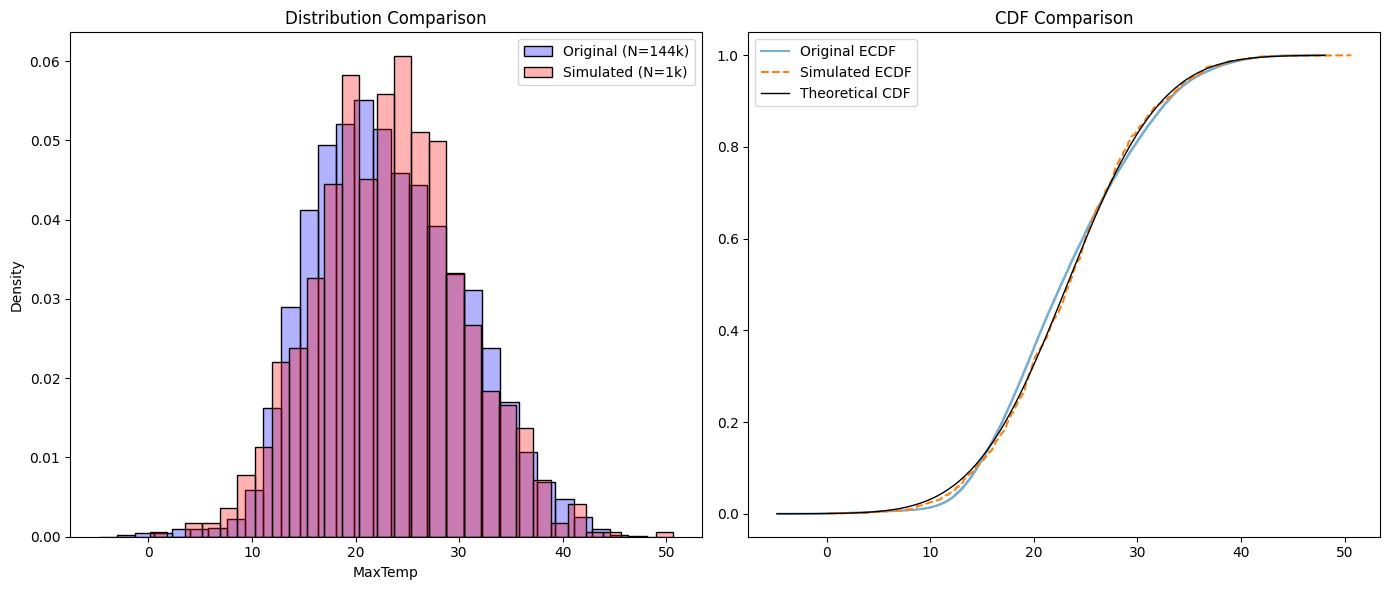

Chi-Square Test (Simulated): Statistic=18.6529, p-value=0.4793
95% CI (Parametric): (23.184603755107275, 23.258092796186425)
95% CI (Bootstrap):  (23.1842, 23.2577)


In [5]:
# select variable
df = pd.read_csv('weatherAUS.csv')
data = df['MaxTemp'].dropna()

# --- Part (a) MLE and Goodness of Fit ---

# Maximum Likelihood Estimation (MLE) for Normal Distribution
# Likelihood L(mu, sigma) is maximized when mu = sample_mean and sigma = sample_std
mu_mle = data.mean()
sigma_mle = data.std()

print(f"MLE Parameters: Mean (mu) = {mu_mle:.4f}, Std Dev (sigma) = {sigma_mle:.4f}")

# Visual Inspection: QQ Plot & Histogram
plt.figure(figsize=(14, 6))
plt.subplot(1, 2, 1)
stats.probplot(data, dist="norm", plot=plt)
plt.title('QQ Plot of MaxTemp')

plt.subplot(1, 2, 2)
sns.histplot(data, kde=False, stat="density", label='Observed Data', color='skyblue', bins=40)
x = np.linspace(data.min(), data.max(), 100)
pdf = stats.norm.pdf(x, mu_mle, sigma_mle)
plt.plot(x, pdf, 'r-', lw=3, label='Fitted Normal PDF')
plt.title('MaxTemp Distribution vs. Fitted Normal')
plt.legend()
plt.tight_layout()
plt.savefig('mle_fit_check.png')
plt.show()

# Formal Test: Kolmogorov-Smirnov (KS) Test
ks_stat, ks_p = stats.kstest(data, 'norm', args=(mu_mle, sigma_mle))
print(f"KS Test: Statistic={ks_stat:.4f}, p-value={ks_p:.4e}")

# --- Part (b) Simulation ---

# Simulate sample of size 1,000
np.random.seed(42)
simulated_data = np.random.normal(mu_mle, sigma_mle, 1000)

# Comparison Plots
plt.figure(figsize=(14, 6))
plt.subplot(1, 2, 1)
sns.histplot(data, stat='density', color='blue', alpha=0.3, label='Original (N=144k)', bins=30)
sns.histplot(simulated_data, stat='density', color='red', alpha=0.3, label='Simulated (N=1k)', bins=30)
plt.legend()
plt.title('Distribution Comparison')

plt.subplot(1, 2, 2)
# Empirical CDFs
x_orig = np.sort(data)
y_orig = np.arange(1, len(data)+1) / len(data)
x_sim = np.sort(simulated_data)
y_sim = np.arange(1, len(simulated_data)+1) / len(simulated_data)
# Theoretical CDF
x_th = np.linspace(data.min(), data.max(), 100)
y_th = stats.norm.cdf(x_th, mu_mle, sigma_mle)

plt.plot(x_orig, y_orig, label='Original ECDF', alpha=0.6)
plt.plot(x_sim, y_sim, label='Simulated ECDF', linestyle='--')
plt.plot(x_th, y_th, label='Theoretical CDF', color='black', linewidth=1)
plt.legend()
plt.title('CDF Comparison')
plt.tight_layout()
plt.savefig('simulation_comparison.png')
plt.show()

# Chi-Square Goodness-of-Fit (Simulated vs Theoretical)
k = 20
obs_counts, bin_edges = np.histogram(simulated_data, bins=k)
exp_props = [stats.norm.cdf(bin_edges[i+1], mu_mle, sigma_mle) - stats.norm.cdf(bin_edges[i], mu_mle, sigma_mle) for i in range(k)]
exp_counts = np.array(exp_props) * len(simulated_data)
exp_counts *= (obs_counts.sum() / exp_counts.sum()) # Normalize
chi2_stat, chi2_p = stats.chisquare(obs_counts, f_exp=exp_counts)
print(f"Chi-Square Test (Simulated): Statistic={chi2_stat:.4f}, p-value={chi2_p:.4f}")

# --- Part (c) Confidence Intervals (95%) ---

# 1. Parametric (t-interval)
n = len(data)
se = sigma_mle / np.sqrt(n)
ci_param = stats.t.interval(0.95, df=n-1, loc=mu_mle, scale=se)

# 2. Non-Parametric (Bootstrap)
bootstrap_means = [np.random.choice(data, size=n, replace=True).mean() for _ in range(1000)]
ci_boot = np.percentile(bootstrap_means, [2.5, 97.5])

print(f"95% CI (Parametric): {ci_param}")
print(f"95% CI (Bootstrap):  ({ci_boot[0]:.4f}, {ci_boot[1]:.4f})")

#### **(3)  Dimensionality Reduction**

--- Variance Explained by First 3 Components ---
PC1: 32.06% (Cumulative: 32.06%)
PC2: 19.07% (Cumulative: 51.13%)
PC3: 12.37% (Cumulative: 63.49%)


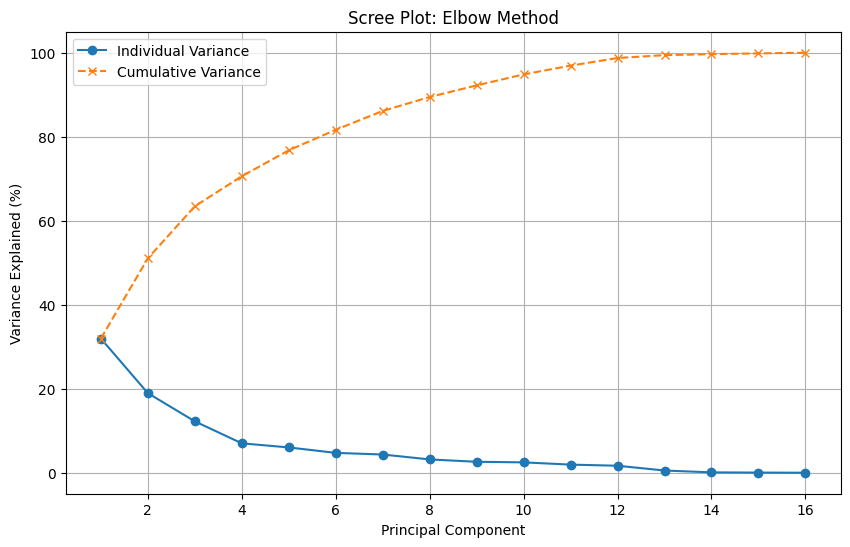

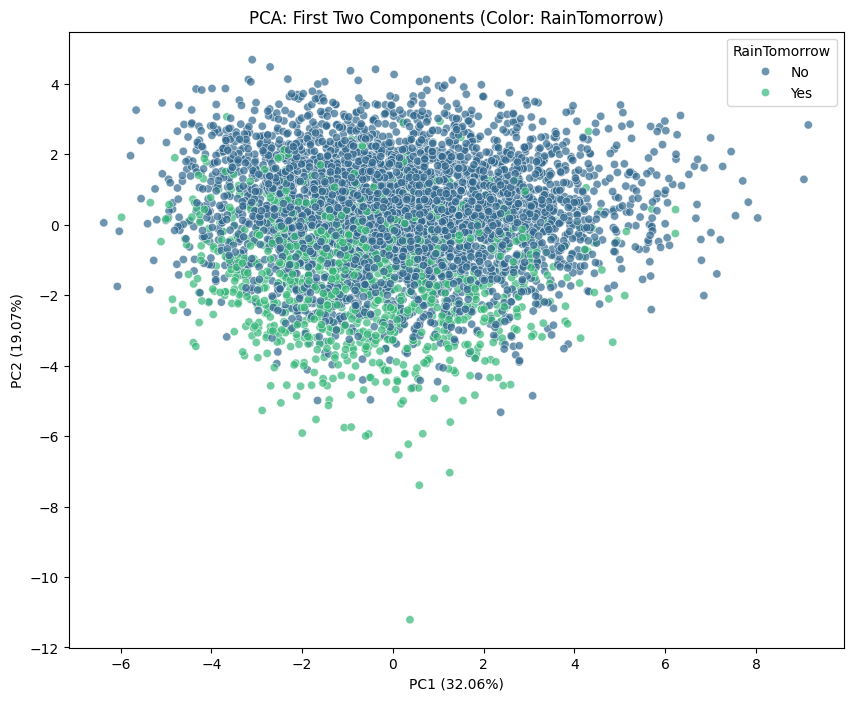


--- Top Contributing Variables (Loadings) ---
PC1 (Top 5):
MaxTemp        0.397723
Temp3pm        0.391202
Temp9am        0.383953
MinTemp        0.321280
Humidity9am    0.293100
Name: PC1, dtype: float64

PC2 (Top 5):
Pressure9am      0.355823
Cloud3pm         0.341121
Cloud9am         0.340226
WindGustSpeed    0.319180
Pressure3pm      0.312108
Name: PC2, dtype: float64


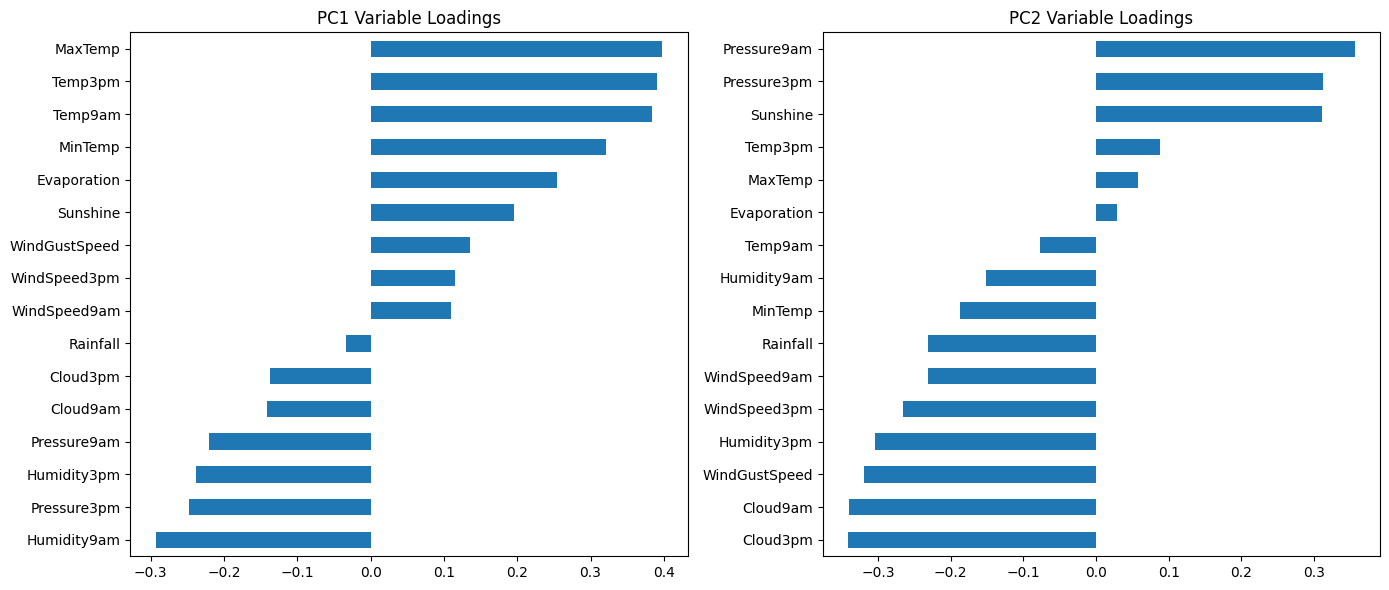

In [6]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.impute import SimpleImputer

# 1. Load and Preprocess Data
df = pd.read_csv('weatherAUS.csv')

# Select numerical features
numerical_cols = df.select_dtypes(include=[np.number]).columns
# We need the target 'RainTomorrow' for visualization later
df_pca = df[numerical_cols].copy()
df_pca['RainTomorrow'] = df['RainTomorrow']

# Drop rows where target is missing (for clean visualization)
df_pca = df_pca.dropna(subset=['RainTomorrow'])

# Separate features (X) and target (y)
X = df_pca.drop(columns=['RainTomorrow'])
y = df_pca['RainTomorrow']

# Imputation (PCA cannot handle NaNs)
imputer = SimpleImputer(strategy='mean')
X_imputed = imputer.fit_transform(X)

# Standardization (Critical step for PCA so larger scales don't dominate)
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_imputed)

# 2. Perform PCA
pca = PCA()
X_pca = pca.fit_transform(X_scaled)

# --- Part (a) Variance Explained ---
exp_var = pca.explained_variance_ratio_
cum_var = np.cumsum(exp_var)

print("--- Variance Explained by First 3 Components ---")
for i in range(3):
    print(f"PC{i+1}: {exp_var[i]*100:.2f}% (Cumulative: {cum_var[i]*100:.2f}%)")

# Scree Plot
plt.figure(figsize=(10, 6))
plt.plot(range(1, len(exp_var) + 1), exp_var * 100, marker='o', label='Individual Variance')
plt.plot(range(1, len(exp_var) + 1), cum_var * 100, marker='x', linestyle='--', label='Cumulative Variance')
plt.xlabel('Principal Component')
plt.ylabel('Variance Explained (%)')
plt.title('Scree Plot: Elbow Method')
plt.grid(True)
plt.legend()
plt.savefig('scree_plot.png')
plt.show()

# --- Part (b) Visualization & Loadings ---

# Scatter Plot (PC1 vs PC2)
plt.figure(figsize=(10, 8))
# Plotting a random subset to avoid overplotting
indices = np.random.choice(len(X_pca), size=5000, replace=False)
sns.scatterplot(x=X_pca[indices, 0], y=X_pca[indices, 1], hue=y.iloc[indices], alpha=0.7, palette='viridis')
plt.xlabel(f'PC1 ({exp_var[0]*100:.2f}%)')
plt.ylabel(f'PC2 ({exp_var[1]*100:.2f}%)')
plt.title('PCA: First Two Components (Color: RainTomorrow)')
plt.savefig('pca_scatter.png')
plt.show()

# Loadings Analysis (Interpretation)
loadings = pd.DataFrame(pca.components_.T, columns=[f'PC{i+1}' for i in range(X.shape[1])], index=X.columns)

print("\n--- Top Contributing Variables (Loadings) ---")
print("PC1 (Top 5):")
print(loadings['PC1'].abs().sort_values(ascending=False).head(5))
print("\nPC2 (Top 5):")
print(loadings['PC2'].abs().sort_values(ascending=False).head(5))

# Plot Loadings
plt.figure(figsize=(14, 6))
plt.subplot(1, 2, 1)
loadings['PC1'].sort_values().plot(kind='barh')
plt.title('PC1 Variable Loadings')
plt.subplot(1, 2, 2)
loadings['PC2'].sort_values().plot(kind='barh')
plt.title('PC2 Variable Loadings')
plt.tight_layout()
plt.savefig('pca_loadings.png')
plt.show()

#### **(4) Classification**

--- Logistic Regression Performance ---
              precision    recall  f1-score   support

           0       0.87      0.95      0.90     22064
           1       0.73      0.50      0.59      6375

    accuracy                           0.85     28439
   macro avg       0.80      0.72      0.75     28439
weighted avg       0.84      0.85      0.83     28439

Accuracy: 0.8451

--- Random Forest Performance ---
              precision    recall  f1-score   support

           0       0.87      0.96      0.91     22064
           1       0.77      0.50      0.61      6375

    accuracy                           0.86     28439
   macro avg       0.82      0.73      0.76     28439
weighted avg       0.85      0.86      0.84     28439

Accuracy: 0.8556


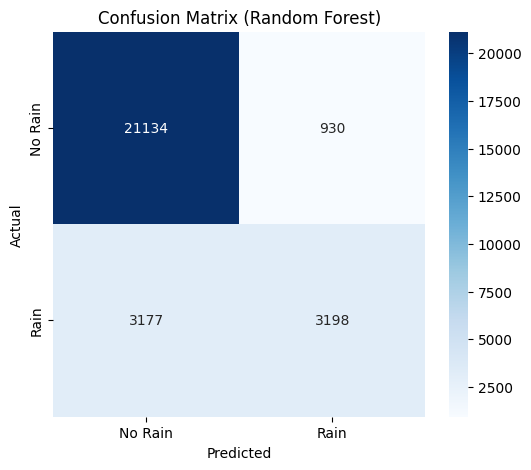

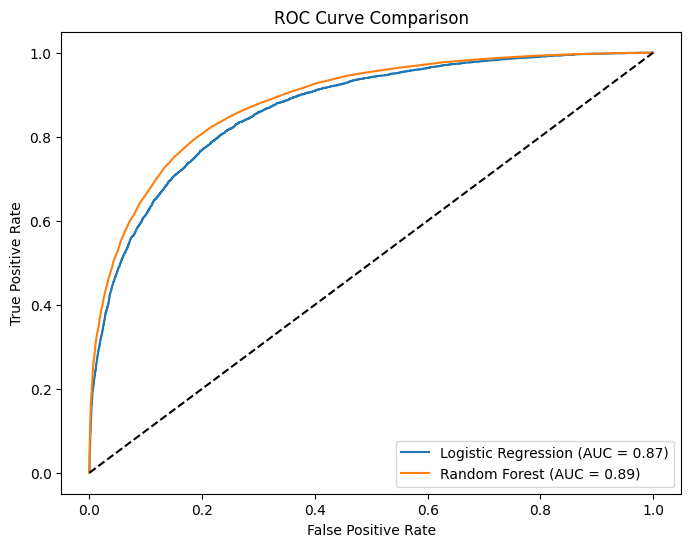

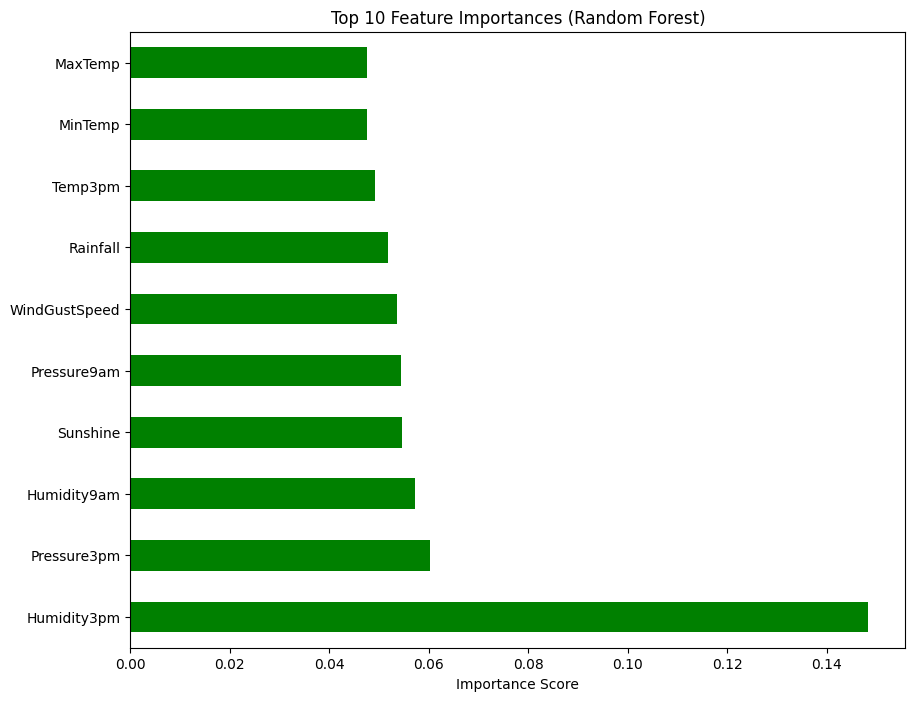

In [8]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.impute import SimpleImputer
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, roc_curve, auc

# 1. Load Data & Select Target
df = pd.read_csv('weatherAUS.csv')

# Drop rows where target is missing
df = df.dropna(subset=['RainTomorrow'])

# Select Features (X) and Target (y)
# We will drop 'Date' and 'Location' to simplify, and 'RainFall' (risk of data leakage if not careful, but usually kept)
# We drop 'Risk_MM' if it exists (it's a cheat variable in some versions of this dataset), but it's not in the snippet.
X = df.drop(columns=['RainTomorrow', 'Date', 'Location'])
y = df['RainTomorrow']

# 2. Preprocessing
# Encode Target (No=0, Yes=1)
le = LabelEncoder()
y = le.fit_transform(y)

# Handle Categorical Features (One-Hot Encoding)
categorical_cols = X.select_dtypes(include=['object']).columns
numerical_cols = X.select_dtypes(include=[np.number]).columns

# Impute Missing Values
# Numerical -> Mean
num_imputer = SimpleImputer(strategy='mean')
X[numerical_cols] = num_imputer.fit_transform(X[numerical_cols])

# Categorical -> Most Frequent (Mode)
cat_imputer = SimpleImputer(strategy='most_frequent')
X[categorical_cols] = cat_imputer.fit_transform(X[categorical_cols])

# One-Hot Encode
X = pd.get_dummies(X, columns=categorical_cols, drop_first=True)

# Split Data (80% Train, 20% Test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# Scale Features (Important for Logistic Regression)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# 3. Model Training & Evaluation

# --- Model A: Logistic Regression (Baseline) ---
log_reg = LogisticRegression(max_iter=1000)
log_reg.fit(X_train_scaled, y_train)
y_pred_log = log_reg.predict(X_test_scaled)
y_prob_log = log_reg.predict_proba(X_test_scaled)[:, 1]

# --- Model B: Random Forest (Non-Linear) ---
rf_clf = RandomForestClassifier(n_estimators=100, random_state=42)
rf_clf.fit(X_train, y_train) # Tree models don't strictly need scaling
y_pred_rf = rf_clf.predict(X_test)
y_prob_rf = rf_clf.predict_proba(X_test)[:, 1]

# 4. Results Display
print("--- Logistic Regression Performance ---")
print(classification_report(y_test, y_pred_log))
print(f"Accuracy: {accuracy_score(y_test, y_pred_log):.4f}")

print("\n--- Random Forest Performance ---")
print(classification_report(y_test, y_pred_rf))
print(f"Accuracy: {accuracy_score(y_test, y_pred_rf):.4f}")

# 5. Visualizations

# Confusion Matrix (Random Forest)
plt.figure(figsize=(6, 5))
cm = confusion_matrix(y_test, y_pred_rf)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['No Rain', 'Rain'], yticklabels=['No Rain', 'Rain'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix (Random Forest)')
plt.savefig('confusion_matrix.png')
plt.show()

# ROC Curve Comparison
fpr_log, tpr_log, _ = roc_curve(y_test, y_prob_log)
fpr_rf, tpr_rf, _ = roc_curve(y_test, y_prob_rf)

plt.figure(figsize=(8, 6))
plt.plot(fpr_log, tpr_log, label=f'Logistic Regression (AUC = {auc(fpr_log, tpr_log):.2f})')
plt.plot(fpr_rf, tpr_rf, label=f'Random Forest (AUC = {auc(fpr_rf, tpr_rf):.2f})')
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve Comparison')
plt.legend()
plt.savefig('roc_curve.png')
plt.show()

# Feature Importance (Random Forest)
plt.figure(figsize=(10, 8))
feat_importances = pd.Series(rf_clf.feature_importances_, index=X.columns)
feat_importances.nlargest(10).plot(kind='barh', color='green')
plt.title('Top 10 Feature Importances (Random Forest)')
plt.xlabel('Importance Score')
plt.savefig('feature_importance.png')
plt.show()

#### **(5) Regression**

--- OLS Performance ---
RMSE: 1.9471
R2: 0.9265

--- Ridge Performance ---
RMSE: 1.9471
R2: 0.9265


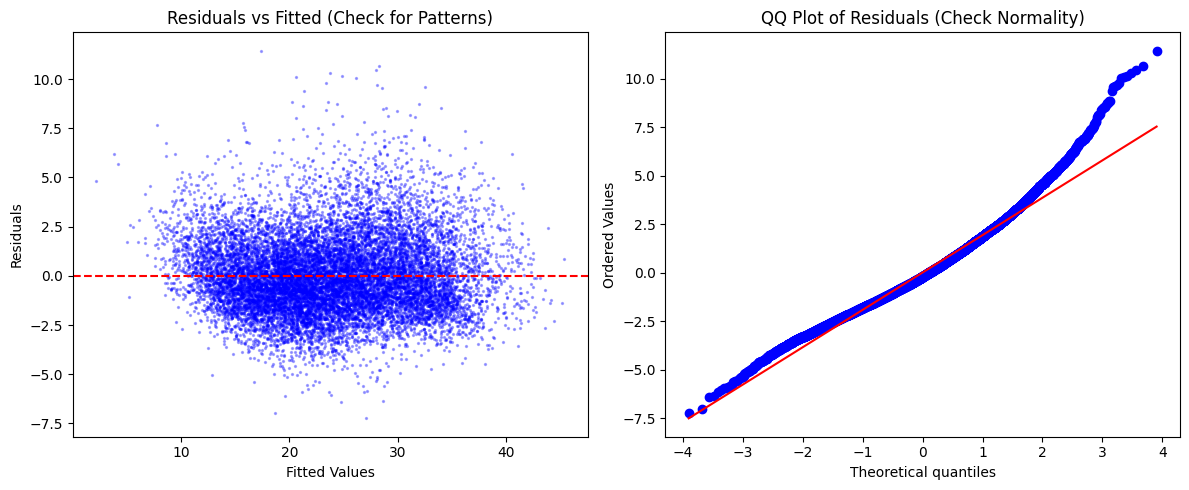


--- OLS Model Summary (Coefficients) ---
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const            23.7273      0.008   2973.550      0.000      23.712      23.743
MinTemp          -0.0343      0.025     -1.375      0.169      -0.083       0.015
Rainfall         -0.0116      0.009     -1.359      0.174      -0.028       0.005
WindGustSpeed    -0.1230      0.009    -13.058      0.000      -0.142      -0.105
Humidity9am       1.2893      0.014     91.622      0.000       1.262       1.317
Humidity3pm      -2.8635      0.013   -221.021      0.000      -2.889      -2.838
Pressure9am       2.1150      0.032     65.084      0.000       2.051       2.179
Pressure3pm      -2.3593      0.032    -73.104      0.000      -2.423      -2.296
Temp9am           6.2434      0.027    227.911      0.000       6.190       6.297
Cloud9am         -0.2066      0.011    -18.431      0.00

In [9]:
from sklearn.model_selection import train_test_split, cross_val_score, KFold
from sklearn.linear_model import LinearRegression, Ridge
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import StandardScaler
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor

# 1. Load Data
df = pd.read_csv('weatherAUS.csv')

# 2. Select Target & Features
# We predict MaxTemp based on morning readings (9am) and other atmospheric conditions
target = 'MaxTemp'
features = ['MinTemp', 'Rainfall', 'WindGustSpeed', 'Humidity9am', 'Humidity3pm', 
            'Pressure9am', 'Pressure3pm', 'Temp9am', 'Cloud9am', 'Cloud3pm']

# Filter data (Remove missing values for regression)
df_reg = df[features + [target]].dropna()

X = df_reg[features]
y = df_reg[target]

# 3. Preprocessing
# Standardize features for comparable coefficients and Ridge regression
scaler = StandardScaler()
X_scaled_array = scaler.fit_transform(X)
X_scaled = pd.DataFrame(X_scaled_array, columns=X.columns, index=X.index)

# Split Data (80% Train, 20% Test)
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

# --- Part (a) Fit Models & Evaluate ---

# Model 1: OLS Linear Regression (using Statsmodels for detailed statistics)
X_train_const = sm.add_constant(X_train)
ols_model = sm.OLS(y_train, X_train_const).fit()

# Model 2: Ridge Regression (Regularization to handle potential multicollinearity)
ridge_model = Ridge(alpha=1.0)
ridge_model.fit(X_train, y_train)

# Predictions
X_test_const = sm.add_constant(X_test)
y_pred_ols = ols_model.predict(X_test_const)
y_pred_ridge = ridge_model.predict(X_test)

# Evaluation Metrics
rmse_ols = np.sqrt(mean_squared_error(y_test, y_pred_ols))
r2_ols = r2_score(y_test, y_pred_ols)

rmse_ridge = np.sqrt(mean_squared_error(y_test, y_pred_ridge))
r2_ridge = r2_score(y_test, y_pred_ridge)

print(f"--- OLS Performance ---")
print(f"RMSE: {rmse_ols:.4f}")
print(f"R2: {r2_ols:.4f}")

print(f"\n--- Ridge Performance ---")
print(f"RMSE: {rmse_ridge:.4f}")
print(f"R2: {r2_ridge:.4f}")

# Residual Analysis Plots
residuals = y_test - y_pred_ols
plt.figure(figsize=(12, 5))

# Residuals vs Fitted
plt.subplot(1, 2, 1)
plt.scatter(y_pred_ols, residuals, alpha=0.3, color='blue', s=2)
plt.axhline(0, color='red', linestyle='--')
plt.xlabel('Fitted Values')
plt.ylabel('Residuals')
plt.title('Residuals vs Fitted (Check for Patterns)')

# QQ Plot
plt.subplot(1, 2, 2)
import scipy.stats as stats
stats.probplot(residuals, dist="norm", plot=plt)
plt.title('QQ Plot of Residuals (Check Normality)')
plt.tight_layout()
plt.savefig('regression_diagnostics.png')
plt.show()

# --- Part (b) Interpret Coefficients & Multicollinearity ---

print("\n--- OLS Model Summary (Coefficients) ---")
print(ols_model.summary().tables[1])

# VIF Calculation (Multicollinearity Check)
vif_data = pd.DataFrame()
vif_data["Feature"] = X_train.columns
vif_data["VIF"] = [variance_inflation_factor(X_train.values, i) for i in range(len(X_train.columns))]
print("\n--- Variance Inflation Factors (VIF) ---")
print(vif_data.sort_values(by="VIF", ascending=False))

# --- Part (c) Cross-Validation ---
cv = KFold(n_splits=10, shuffle=True, random_state=42)
cv_scores = cross_val_score(LinearRegression(), X_scaled, y, cv=cv, scoring='neg_mean_squared_error')
cv_rmse = np.sqrt(-cv_scores)

print(f"\n--- Cross-Validation (10-Fold) ---")
print(f"Average RMSE: {cv_rmse.mean():.4f}")
print(f"Std RMSE: {cv_rmse.std():.4f}")

#### **(6) Monte Carlo Methods**

--- Monte Carlo Results (N=1000) ---
Empirical Probability: 0.05571 (approx. 5.57%)
MC Mean Estimate:      0.05570
Standard Error:        0.00062
95% Confidence Interval: [0.05454, 0.05691]


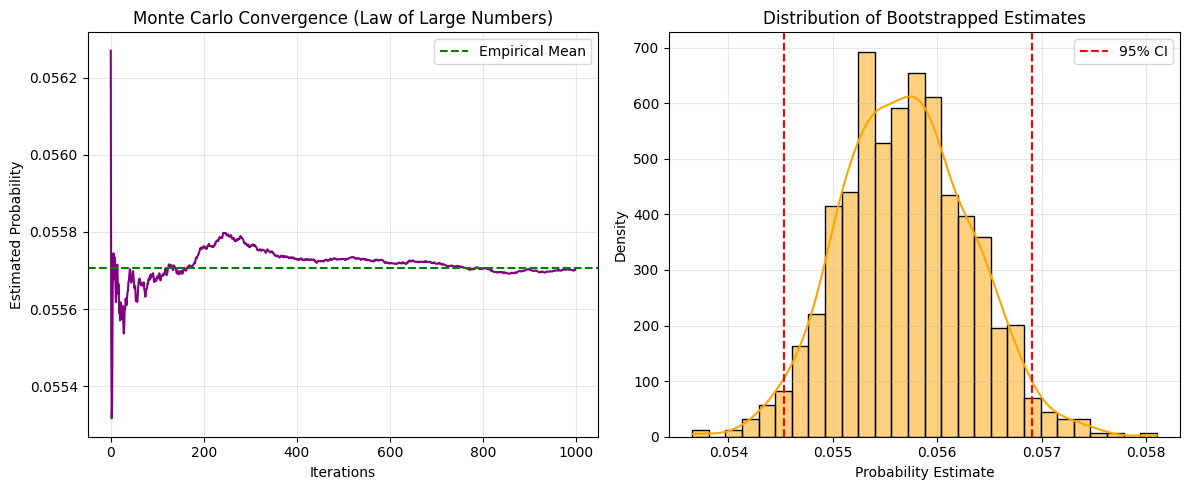

In [10]:
# 1. Load Data
df = pd.read_csv('weatherAUS.csv')

# --- Part (a) Problem Definition ---
# Problem: Estimate the probability P(MaxTemp > 35) and its 95% Confidence Interval.
# We treat the observed data as our "population" and use Bootstrap Resampling to simulate 
# 1000 alternative "histories" to measure the stability of this probability.

data = df['MaxTemp'].dropna()
threshold = 35.0

# Empirical Probability (Ground Truth for our sample)
p_hat = (data > threshold).mean()

# --- Part (b) Implementation ---
n_iterations = 1000
sample_size = len(data)
mc_estimates = []

np.random.seed(42)  # Reproducibility

for i in range(n_iterations):
    # 1. Resample with replacement (Bootstrap)
    resample = np.random.choice(data, size=sample_size, replace=True)
    # 2. Calculate the statistic (Probability of > 35 degrees)
    prob_sim = (resample > threshold).mean()
    mc_estimates.append(prob_sim)

mc_estimates = np.array(mc_estimates)

# --- Part (c) Analysis & Visualization ---
mc_mean = mc_estimates.mean()
mc_std_error = mc_estimates.std()
ci_lower = np.percentile(mc_estimates, 2.5)
ci_upper = np.percentile(mc_estimates, 97.5)

print(f"--- Monte Carlo Results (N={n_iterations}) ---")
print(f"Empirical Probability: {p_hat:.5f} (approx. {p_hat*100:.2f}%)")
print(f"MC Mean Estimate:      {mc_mean:.5f}")
print(f"Standard Error:        {mc_std_error:.5f}")
print(f"95% Confidence Interval: [{ci_lower:.5f}, {ci_upper:.5f}]")

# Visualizations
plt.figure(figsize=(12, 5))

# 1. Convergence Plot
running_means = [np.mean(mc_estimates[:i+1]) for i in range(n_iterations)]
plt.subplot(1, 2, 1)
plt.plot(running_means, color='purple', linewidth=1.5)
plt.axhline(p_hat, color='green', linestyle='--', label='Empirical Mean')
plt.xlabel('Iterations')
plt.ylabel('Estimated Probability')
plt.title('Monte Carlo Convergence (Law of Large Numbers)')
plt.legend()
plt.grid(True, alpha=0.3)

# 2. Distribution of Estimates
plt.subplot(1, 2, 2)
sns.histplot(mc_estimates, kde=True, color='orange', stat='density')
plt.axvline(ci_lower, color='red', linestyle='--', label='95% CI')
plt.axvline(ci_upper, color='red', linestyle='--')
plt.xlabel('Probability Estimate')
plt.title('Distribution of Bootstrapped Estimates')
plt.legend()
plt.grid(True, alpha=0.3)

plt.tight_layout()
plt.savefig('monte_carlo_final.png')
plt.show()